In [103]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings('ignore')

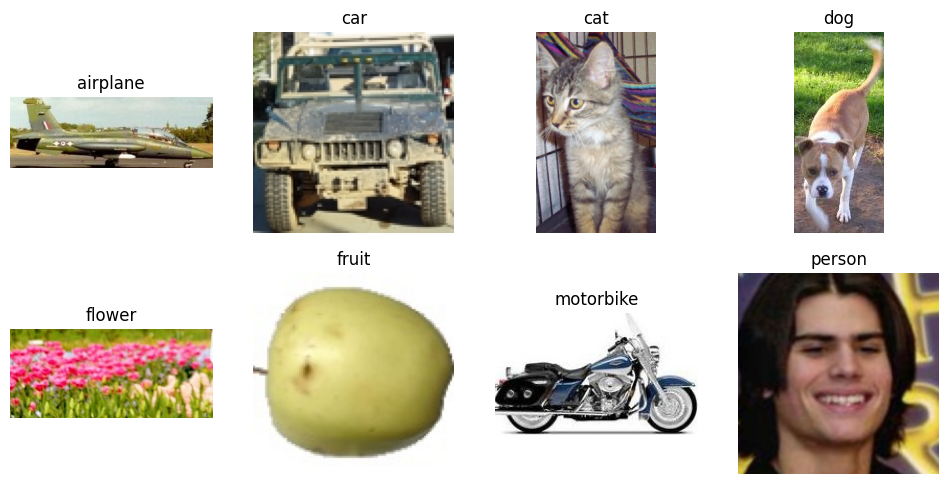

In [104]:
train_path = "D:/Учёба/neironki/train"
validation_path = "D:/Учёба/neironki/validation"
test_path = "D:/Учёба/neironki/test"

image_categories = os.listdir('D:/Учёба/neironki/train')

def plot_images(image_categories):

    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):

        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0

        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

plot_images(image_categories)

In [105]:
train_gen = ImageDataGenerator(rescale = 1.0/255.0)
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

val_gen = ImageDataGenerator(rescale = 1.0/255.0)
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

test_gen = ImageDataGenerator(rescale = 1.0/255.0)
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 4826 images belonging to 8 classes.
Found 1034 images belonging to 8 classes.
Found 1039 images belonging to 8 classes.


In [106]:
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'airplane', 1: 'car', 2: 'cat', 3: 'dog', 4: 'flower', 5: 'fruit', 6: 'motorbike', 7: 'person'}


In [107]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.23))
model.add(Dense(8, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 37, 37, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 87616)             0         
                                                                 
 dense_18 (Dense)            (None, 128)             

In [108]:
early_stopping = keras.callbacks.EarlyStopping(patience=8)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=10, 
                 batch_size= 32,
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 4826//32,
                 validation_steps = 1034//32,
                 callbacks=early_stopping)

Epoch 1/10
150/150 [==============================] - 39s 257ms/step - loss: 0.7953 - accuracy: 0.7222 - val_loss: 0.4152 - val_accuracy: 0.8496
Epoch 2/10
150/150 [==============================] - 39s 260ms/step - loss: 0.2636 - accuracy: 0.9070 - val_loss: 0.2954 - val_accuracy: 0.8916
Epoch 3/10
150/150 [==============================] - 39s 260ms/step - loss: 0.1258 - accuracy: 0.9564 - val_loss: 0.2028 - val_accuracy: 0.9238
Epoch 4/10
150/150 [==============================] - 38s 256ms/step - loss: 0.0818 - accuracy: 0.9720 - val_loss: 0.2472 - val_accuracy: 0.9268
Epoch 5/10
150/150 [==============================] - 40s 264ms/step - loss: 0.0468 - accuracy: 0.9858 - val_loss: 0.2923 - val_accuracy: 0.9111
Epoch 6/10
150/150 [==============================] - 38s 255ms/step - loss: 0.0226 - accuracy: 0.9914 - val_loss: 0.3198 - val_accuracy: 0.9180
Epoch 7/10
150/150 [==============================] - 37s 247ms/step - loss: 0.0528 - accuracy: 0.9841 - val_loss: 0.2716 - val_ac

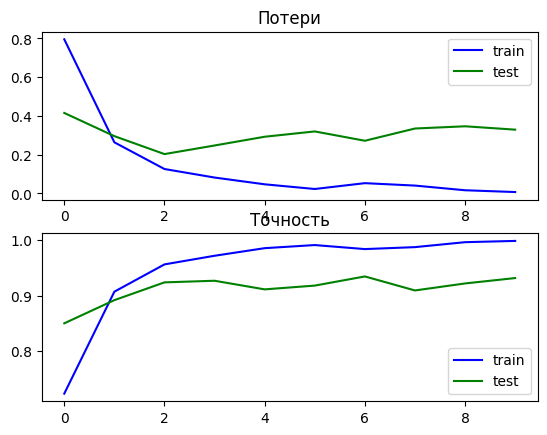

In [115]:
h = hist.history
plt.subplot(211)
plt.title('Потери')
plt.plot(h['loss'], color='blue', label='train')
plt.plot(h['val_loss'], color='green', label='test')
plt.legend()

plt.subplot(212)
plt.title('Точность')
plt.plot(h['accuracy'], color='blue', label='train')
plt.plot(h['val_accuracy'], color='green', label='test')
plt.legend()
plt.show()

In [110]:
model.evaluate(test_image_generator)

33/33 [==============================] - 2s 51ms/step - loss: 0.3213 - accuracy: 0.9288


[0.32129421830177307, 0.9287776947021484]

1/1 [==============================] - 0s 46ms/step


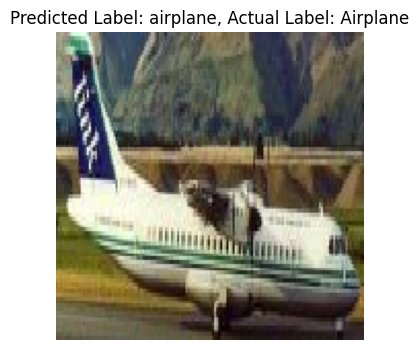

In [111]:
test_image_path = 'D:/Учёба/neironki/test/airplane/airplane_0005.jpg'

def generate_predictions(test_image_path, actual_label):

    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

generate_predictions(test_image_path, actual_label='Airplane')

1/1 [==============================] - 0s 21ms/step


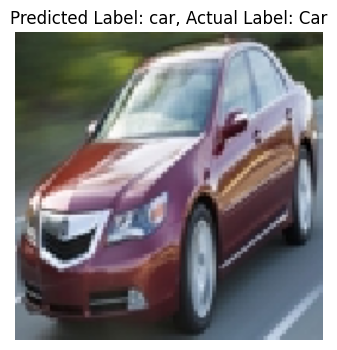

In [112]:
test_image_path = 'D:/Учёба/neironki/test/car/car_0009.jpg'

def generate_predictions(test_image_path, actual_label):

    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

generate_predictions(test_image_path, actual_label='Car')

1/1 [==============================] - 0s 21ms/step


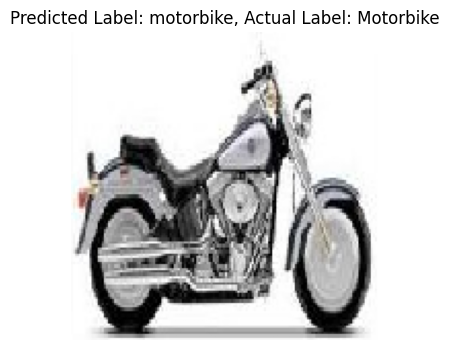

In [113]:
test_image_path = 'D:/Учёба/neironki/test/motorbike/motorbike_0006.jpg'

def generate_predictions(test_image_path, actual_label):

    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

generate_predictions(test_image_path, actual_label='Motorbike')

In [114]:
model.save('Model-CNN-3.h5')